# Практическое задание № 2. Нейронные сети


**Работу выполнил:**

Мовчан Игорь, 368540

## Прогнозирование цены на жилье с помощью нейросетевой регрессионной модели

Необходимо по имеющимся данным о ценах на жильё предсказать окончательную цену каждого дома с учетом характеристик домов с использованием нейронной сети. Описание набора данных  содержит 80 классов (набор переменых) классификации оценки типа жилья, и находится в файле `data_description.txt`.

В работе требуется дополнить раздел «Моделирование» в подразделе «Построение и обучение модели» создать и инициализировать последовательную модель нейронной сети с помощью фрэймворков тренировки нейронных сетей как: Torch или Tensorflow. Скомпилировать нейронную сеть выбрав функцию потерь и оптимизатор соответственно. Оценить точность полученных результатов. Вывести предсказанные данные о продаже. 


### Импорт библиотек
Импортируем необходимые библиотеки:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

### Считываем набор данных


Загрузим набор данных и присвоим следующими переменные:

* `train_data`: данные, используемые для обучения модели
* `test_data`: данные, используемые для проверки модели

In [2]:
train_data = pd.read_csv('./train.csv')
test_data = pd.read_csv('./test.csv')

## Подготовка данных
### Отобразим обучающие и проверочные данные:

In [3]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


Как можно видеть, `train_data` имеет на один столбец больше, чем `test_data`, это столбец `SalePrice`, для обучения модели перед применением ее для предсказания меток в test_data.

### Проверяем нет ли тестовые данные пустых значений значений (Nan)

Построим функцию `def missing_value_checker` для проверки и подсчёта пропущеных значений в test_data. А также выведем тип данных этих значений.


In [5]:
def missing_value_checker(data):
    list = []
    for feature in data.columns:
        if data[feature].isnull().values.any():
            
            sum = data[feature].isna().sum()

            type = data[feature].dtype

            print (f'{feature}: {sum}, type: {type}')
            
            list.append(feature)
    print(list)

    print(len(list))

missing_value_checker(test_data)

MSZoning: 4, type: object
LotFrontage: 227, type: float64
Alley: 1352, type: object
Utilities: 2, type: object
Exterior1st: 1, type: object
Exterior2nd: 1, type: object
MasVnrType: 894, type: object
MasVnrArea: 15, type: float64
BsmtQual: 44, type: object
BsmtCond: 45, type: object
BsmtExposure: 44, type: object
BsmtFinType1: 42, type: object
BsmtFinSF1: 1, type: float64
BsmtFinType2: 42, type: object
BsmtFinSF2: 1, type: float64
BsmtUnfSF: 1, type: float64
TotalBsmtSF: 1, type: float64
BsmtFullBath: 2, type: float64
BsmtHalfBath: 2, type: float64
KitchenQual: 1, type: object
Functional: 2, type: object
FireplaceQu: 730, type: object
GarageType: 76, type: object
GarageYrBlt: 78, type: float64
GarageFinish: 78, type: object
GarageCars: 1, type: float64
GarageArea: 1, type: float64
GarageQual: 78, type: object
GarageCond: 78, type: object
PoolQC: 1456, type: object
Fence: 1169, type: object
MiscFeature: 1408, type: object
SaleType: 1, type: object
['MSZoning', 'LotFrontage', 'Alley', 'Ut

Проверяем какие признаки в таблице можно оставить, а какие удалить. Если пропущенных значений слишком много, то удалим признак. Если их небольшое количество, то заполним `mean` или `median` для чисел, новая категория `missing` для строковых объектов.

В соответствии с этим:

– удалим ['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'];

– заполним числовое отсутствующее значение значением `mean`;

– заполним строковое отсутствующее значение значением `missing`.

Также нормализуем наши данные для получения более лучших результатов:

In [6]:
to_drop = ['Id', 'Alley','FireplaceQu','PoolQC', 'Fence', 'MiscFeature']
test_edited = test_data.drop(to_drop, axis=1)
train_edited = train_data.drop(to_drop, axis=1)

def nan_filler(data, min_max={}):
    flag = bool(min_max.copy())
    for label, content in data.items():
        if pd.api.types.is_numeric_dtype(content):
            data[label] = content.fillna(content.median())
            if label != "SalePrice":
                if not flag:
                    min_max[label] = [data[label].min(), data[label].max()]
                minimum, maximum = min_max[label]
                data[label] = (data[label] - minimum)/(maximum - minimum)
        else:
            data[label] = content.astype("category").cat.as_ordered()
            data[label] = pd.Categorical(content).codes+1
    return min_max

min_max = nan_filler(test_edited)
nan_filler(train_edited, min_max)
test_edited["MSZoning"]

0       3
1       4
2       4
3       4
4       4
       ..
1454    5
1455    5
1456    4
1457    4
1458    4
Name: MSZoning, Length: 1459, dtype: int8

### Перепроверим наши данные:

In [7]:
missing_value_checker(test_edited)

[]
0


In [8]:
missing_value_checker(train_edited)

[]
0


In [9]:
train_edited.shape, test_edited.shape

((1460, 75), (1459, 74))

In [10]:
test_edited.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   float64
 1   MSZoning       1459 non-null   int8   
 2   LotFrontage    1459 non-null   float64
 3   LotArea        1459 non-null   float64
 4   Street         1459 non-null   int8   
 5   LotShape       1459 non-null   int8   
 6   LandContour    1459 non-null   int8   
 7   Utilities      1459 non-null   int8   
 8   LotConfig      1459 non-null   int8   
 9   LandSlope      1459 non-null   int8   
 10  Neighborhood   1459 non-null   int8   
 11  Condition1     1459 non-null   int8   
 12  Condition2     1459 non-null   int8   
 13  BldgType       1459 non-null   int8   
 14  HouseStyle     1459 non-null   int8   
 15  OverallQual    1459 non-null   float64
 16  OverallCond    1459 non-null   float64
 17  YearBuilt      1459 non-null   float64
 18  YearRemo

In [11]:
train_edited.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   float64
 1   MSZoning       1460 non-null   int8   
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   float64
 4   Street         1460 non-null   int8   
 5   LotShape       1460 non-null   int8   
 6   LandContour    1460 non-null   int8   
 7   Utilities      1460 non-null   int8   
 8   LotConfig      1460 non-null   int8   
 9   LandSlope      1460 non-null   int8   
 10  Neighborhood   1460 non-null   int8   
 11  Condition1     1460 non-null   int8   
 12  Condition2     1460 non-null   int8   
 13  BldgType       1460 non-null   int8   
 14  HouseStyle     1460 non-null   int8   
 15  OverallQual    1460 non-null   float64
 16  OverallCond    1460 non-null   float64
 17  YearBuilt      1460 non-null   float64
 18  YearRemo

### Разделим данные

Поскольку мы не знаем метку (Цена) тестовых данных, для оценки модели, чтобы получить лучшую модель перед прогнозированием тестовых данных, разделим данные в файле train.scv на обучающие и проверочные данные, соотношение составляет 20%.

In [12]:
X = train_edited.drop('SalePrice', axis=1)
y = train_edited['SalePrice']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2)

Размерности получившихся разделений:

In [13]:
y_train.shape, X_train.shape, X_val.shape, y_val.shape

((1168,), (1168, 74), (292, 74), (292,))

In [14]:
X_train.shape, test_edited.shape

((1168, 74), (1459, 74))

## Моделирование

### Построение и обучение модели

Создадим последовательную модель нейронной сети с помощью фрэймворка тренировки нейронных сетей Tensorflow. На начальном слое будет 16 нейронов, активация - линейная.

In [15]:
from tensorflow import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [16]:
model = Sequential([
    Dense(16, input_dim=X_train.shape[1], activation='linear'),
    Dense(1, activation='linear')
])
random.set_seed(40)

Скомпилируем нейронную сеть, выбрав в качестве функции потерь, которую необходимо минимизировать, `mae`, а в качестве оптимизатора - `Adam` с `learning_rate=0.05`, метрика стандартная для задачи регрессии - `mae`.

In [17]:
model.compile(optimizer=Adam(learning_rate=0.05),
              loss='mae',
              metrics=['mae'])

Обучим модель на обучающих данных `X_train` и `y_train`, задав гиперпараметры гипепараметеры:
- `epochs=100`
- `batch_size=32`

In [18]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/100
37/37 [==============================] - 1s 9ms/step - loss: 177559.0625 - mae: 177559.0625 - val_loss: 167612.0312 - val_mae: 167612.0312
Epoch 2/100
37/37 [==============================] - 0s 4ms/step - loss: 149246.6562 - mae: 149246.6562 - val_loss: 118639.8750 - val_mae: 118639.8750
Epoch 3/100
37/37 [==============================] - 0s 4ms/step - loss: 84233.9688 - mae: 84233.9688 - val_loss: 55695.2500 - val_mae: 55695.2500
Epoch 4/100
37/37 [==============================] - 0s 4ms/step - loss: 53573.8750 - mae: 53573.8750 - val_loss: 53891.1406 - val_mae: 53891.1406
Epoch 5/100
37/37 [==============================] - 0s 4ms/step - loss: 52511.8711 - mae: 52511.8711 - val_loss: 53199.2773 - val_mae: 53199.2773
Epoch 6/100
37/37 [==============================] - 0s 4ms/step - loss: 51860.6836 - mae: 51860.6836 - val_loss: 52462.3672 - val_mae: 52462.3672
Epoch 7/100
37/37 [==============================] - 0s 4ms/step - loss: 51155.3047 - mae: 51155.3047 - val_lo

**Оценка полученных результатов**

{'loss': [177559.0625, 149246.65625, 84233.96875, 53573.875, 52511.87109375, 51860.68359375, 51155.3046875, 50411.92578125, 49686.3046875, 48894.01171875, 48139.1328125, 47290.12890625, 46471.1796875, 45472.453125, 44534.6171875, 43627.5625, 42583.734375, 41605.66015625, 40503.7890625, 39475.11328125, 38491.6875, 37432.65234375, 36416.30859375, 35599.8984375, 34652.875, 33943.67578125, 33244.2578125, 32641.880859375, 32205.3359375, 31570.658203125, 30935.404296875, 30550.158203125, 30016.7734375, 29775.8125, 29443.03515625, 28961.072265625, 28732.654296875, 28648.04296875, 28148.5546875, 27959.423828125, 27740.548828125, 27449.513671875, 27147.263671875, 26978.171875, 26737.083984375, 26689.09375, 26210.02734375, 26051.052734375, 25748.04296875, 25584.982421875, 25467.767578125, 25086.4296875, 25050.572265625, 24892.759765625, 24632.201171875, 24553.3046875, 24225.123046875, 24124.65234375, 23932.873046875, 23789.533203125, 23545.9375, 23440.212890625, 23314.724609375, 23113.326171875,

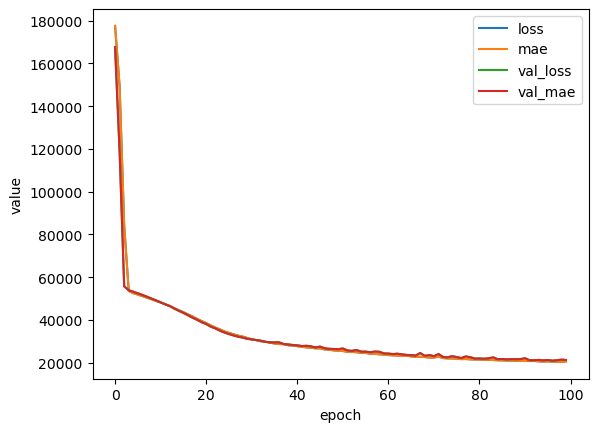

In [19]:
pd.DataFrame(history.history).plot()
plt.ylabel('value')
plt.xlabel('epoch')
print(history.history)

Получили приемлемые ошибки: наша модель в среднем ошибается на ~21 тысячу. Также можно отметить "рывки" на графиках обучения, они связаны с тем, что мы "скачем" вокруг минимума фукнции потерь, что, естественно, не есть хорошо (это исправляется, например, уменьшением шага). Посмтрим, можно ли лучше?

## Изменения

Изменение параметров `batch_size` (количество данных для измерения градиента на каждом шаге) и `epochs` (количество эпох) напрямую влияет на обучение (`epochs` делает обучение более длительным, помогая с недообучением, возникающим, например, при задании маленького шага; большие же значения `batch_size` увеличивают точность градиента (так как мы "накапливаем его"), а также время на обучение модели). Давайте покажем это.

Итак, зададим всю ту же модель:

In [43]:
model = Sequential([
    Dense(16, input_dim=X_train.shape[1], activation='linear'),
    Dense(1, activation='linear')
])
random.set_seed(40)

In [44]:
model.compile(optimizer=Adam(learning_rate=0.05),
              loss='mae',
              metrics=['mae'])

Изменим `batch_size` с 32 до 128, соответственно, сделав вычисление градиента более точным. Параметр `epochs` же увеличим, ожидая, что модель будет достаточно долго обучаться:

In [45]:
history = model.fit(X_train, y_train, epochs=300, batch_size=128, validation_data=(X_val, y_val))

Epoch 1/300
10/10 [==============================] - 1s 22ms/step - loss: 180913.6250 - mae: 180913.6250 - val_loss: 178931.3906 - val_mae: 178931.3906
Epoch 2/300
10/10 [==============================] - 0s 9ms/step - loss: 179407.2969 - mae: 179407.2969 - val_loss: 176457.2188 - val_mae: 176457.2188
Epoch 3/300
10/10 [==============================] - 0s 9ms/step - loss: 176144.7188 - mae: 176144.7188 - val_loss: 171923.0312 - val_mae: 171923.0312
Epoch 4/300
10/10 [==============================] - 0s 9ms/step - loss: 170638.4375 - mae: 170638.4375 - val_loss: 164868.7656 - val_mae: 164868.7656
Epoch 5/300
10/10 [==============================] - 0s 9ms/step - loss: 162450.3906 - mae: 162450.3906 - val_loss: 154920.3906 - val_mae: 154920.3906
Epoch 6/300
10/10 [==============================] - 0s 8ms/step - loss: 151254.3750 - mae: 151254.3750 - val_loss: 141815.8281 - val_mae: 141815.8281
Epoch 7/300
10/10 [==============================] - 0s 8ms/step - loss: 136865.5469 - mae: 1

{'loss': [180913.625, 179407.296875, 176144.71875, 170638.4375, 162450.390625, 151254.375, 136865.546875, 119189.4375, 98469.9296875, 76824.75, 60042.90234375, 53975.94921875, 53312.45703125, 53221.66796875, 52978.7890625, 52686.375, 52462.83984375, 52323.09765625, 52152.5703125, 51923.8515625, 51736.64453125, 51532.46875, 51345.72265625, 51108.94140625, 50912.43359375, 50736.875, 50497.53515625, 50326.40625, 50099.3828125, 49858.4296875, 49631.55078125, 49417.34765625, 49315.72265625, 49004.53125, 48734.76171875, 48535.76171875, 48273.04296875, 48047.41796875, 47811.48828125, 47571.31640625, 47323.59765625, 47057.30859375, 46794.4375, 46536.421875, 46265.76171875, 46006.43359375, 45740.82421875, 45505.44140625, 45214.26953125, 44914.015625, 44634.22265625, 44337.44140625, 44046.8125, 43759.3515625, 43449.45703125, 43121.5, 42858.2109375, 42586.83984375, 42284.65625, 41951.640625, 41603.796875, 41265.60546875, 40938.86328125, 40605.765625, 40351.69921875, 40023.1328125, 39626.484375, 3

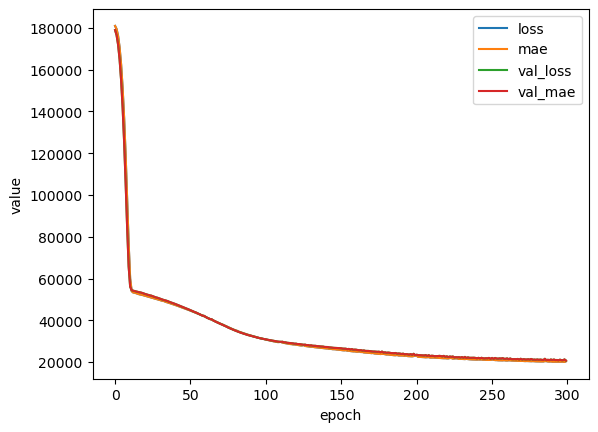

In [46]:
pd.DataFrame(history.history).plot()
plt.ylabel('value')
plt.xlabel('epoch')
print(history.history)

Значения незначительно улучшились!

## Добавление нейронов на начальном слое

Попробуем теперь увеличить количество нейронов на входном слое с 16 до 64

In [70]:
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='linear'),
    Dense(1, activation='linear')
])
random.set_seed(40)

In [71]:
model.compile(optimizer=Adam(learning_rate=0.05),
              loss='mae',
              metrics=['mae'])

In [72]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/100
37/37 [==============================] - 1s 10ms/step - loss: 167899.7969 - mae: 167899.7969 - val_loss: 133323.6406 - val_mae: 133323.6406
Epoch 2/100
37/37 [==============================] - 0s 6ms/step - loss: 80744.1562 - mae: 80744.1562 - val_loss: 55496.6094 - val_mae: 55496.6094
Epoch 3/100
37/37 [==============================] - 0s 5ms/step - loss: 53149.1602 - mae: 53149.1602 - val_loss: 53053.7930 - val_mae: 53053.7930
Epoch 4/100
37/37 [==============================] - 0s 5ms/step - loss: 51412.7930 - mae: 51412.7930 - val_loss: 51650.5859 - val_mae: 51650.5859
Epoch 5/100
37/37 [==============================] - 0s 5ms/step - loss: 50021.3281 - mae: 50021.3281 - val_loss: 49993.4414 - val_mae: 49993.4414
Epoch 6/100
37/37 [==============================] - 0s 5ms/step - loss: 48621.5820 - mae: 48621.5820 - val_loss: 48298.2617 - val_mae: 48298.2617
Epoch 7/100
37/37 [==============================] - 0s 5ms/step - loss: 46946.4336 - mae: 46946.4336 - val_loss:

{'loss': [167899.796875, 80744.15625, 53149.16015625, 51412.79296875, 50021.328125, 48621.58203125, 46946.43359375, 45216.7578125, 43431.7890625, 41500.7109375, 39603.11328125, 37541.12109375, 36249.80078125, 34414.02734375, 33133.50390625, 31938.58984375, 30811.826171875, 30149.646484375, 29872.4140625, 29042.5, 28602.68359375, 27863.583984375, 27568.705078125, 27001.9921875, 26461.248046875, 26369.232421875, 25964.45703125, 25430.173828125, 25222.951171875, 24699.205078125, 24225.306640625, 23933.548828125, 23598.60546875, 23641.03515625, 23397.21484375, 22728.072265625, 22677.931640625, 22472.61328125, 22278.548828125, 21929.806640625, 21809.9765625, 22242.28125, 21474.0234375, 21882.642578125, 21385.173828125, 21195.048828125, 21178.28515625, 21016.603515625, 20838.4375, 20926.052734375, 20685.25390625, 20701.564453125, 20619.16015625, 20821.787109375, 20360.33984375, 20525.9296875, 20642.0625, 20827.685546875, 20277.0546875, 20126.361328125, 20166.57421875, 20025.591796875, 20152.

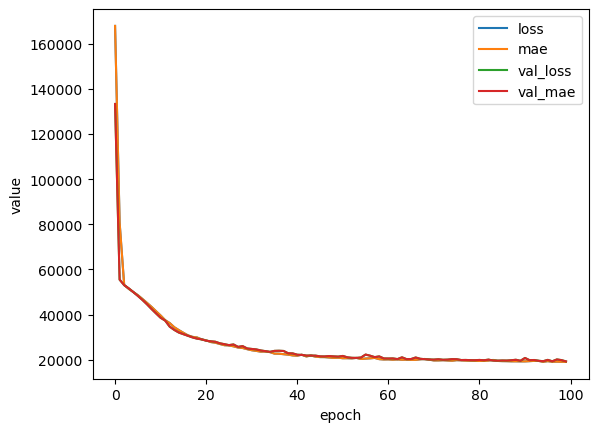

In [73]:
pd.DataFrame(history.history).plot()
plt.ylabel('value')
plt.xlabel('epoch')
print(history.history)

Модель стала сложнее, но начала давать лучшие результаты (однако больше - не всегда лучше, ведь, увеличия сложность модели, мы увеличиваем и количество времени, нужное на обучение, а также склоняем к переобучению).

## Добавление скрытого слоя

Добавим в нашу модель скрытый слой с 64 нейронами и линейной функцией активации `relu`, отсекающей отрицательные значения:

In [110]:
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='linear'),
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(1, activation='linear')
])
random.set_seed(40)

In [111]:
model.compile(optimizer=Adam(learning_rate=0.05),
              loss='mae',
              metrics=['mae'])

In [112]:
history = model.fit(X_train, y_train, epochs=75, batch_size=100, validation_data=(X_val, y_val))

Epoch 1/75
12/12 [==============================] - 1s 19ms/step - loss: 172725.8438 - mae: 172725.8438 - val_loss: 134872.9375 - val_mae: 134872.9375
Epoch 2/75
12/12 [==============================] - 0s 9ms/step - loss: 84424.8359 - mae: 84424.8359 - val_loss: 66311.6797 - val_mae: 66311.6719
Epoch 3/75
12/12 [==============================] - 0s 10ms/step - loss: 58895.6836 - mae: 58895.6836 - val_loss: 53333.4062 - val_mae: 53333.4062
Epoch 4/75
12/12 [==============================] - 0s 9ms/step - loss: 53099.6680 - mae: 53099.6680 - val_loss: 52270.5000 - val_mae: 52270.5000
Epoch 5/75
12/12 [==============================] - 0s 9ms/step - loss: 50493.0312 - mae: 50493.0312 - val_loss: 49780.2148 - val_mae: 49780.2148
Epoch 6/75
12/12 [==============================] - 0s 8ms/step - loss: 48188.8750 - mae: 48188.8750 - val_loss: 46549.9453 - val_mae: 46549.9453
Epoch 7/75
12/12 [==============================] - 0s 7ms/step - loss: 45204.4688 - mae: 45204.4688 - val_loss: 44227

В принципе ошибка осталась на прежнем уровне. Посмотрим, что можно сделать ещё!

## Оптимизаторы и функции потерь

До этого мы использовали универсальный и достаточно эффективный оптимизатор `Adam`, посмотрим, что изменится, если мы сменим его на `Adamax`, модификацию предыдущего (модель оставим при этом прежней, по сути задев только часть с её обучением):

In [117]:
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='linear'),
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(1, activation='linear')
])
random.set_seed(40)

In [118]:
from tensorflow.keras.optimizers import Adamax

model.compile(optimizer=Adamax(learning_rate=0.05),
              loss='mae',
              metrics=['mae'])

In [119]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/100
37/37 [==============================] - 1s 11ms/step - loss: 126226.4922 - mae: 126226.4922 - val_loss: 65264.0469 - val_mae: 65264.0469
Epoch 2/100
37/37 [==============================] - 0s 6ms/step - loss: 53084.8906 - mae: 53084.8906 - val_loss: 51884.8008 - val_mae: 51884.8008
Epoch 3/100
37/37 [==============================] - 0s 5ms/step - loss: 49935.4883 - mae: 49935.4883 - val_loss: 48272.0938 - val_mae: 48272.0938
Epoch 4/100
37/37 [==============================] - 0s 5ms/step - loss: 46463.8203 - mae: 46463.8203 - val_loss: 44705.0664 - val_mae: 44705.0664
Epoch 5/100
37/37 [==============================] - 0s 5ms/step - loss: 43053.5508 - mae: 43053.5508 - val_loss: 40329.5977 - val_mae: 40329.5977
Epoch 6/100
37/37 [==============================] - 0s 5ms/step - loss: 38405.2344 - mae: 38405.2344 - val_loss: 35475.9258 - val_mae: 35475.9258
Epoch 7/100
37/37 [==============================] - 0s 5ms/step - loss: 33907.8789 - mae: 33907.8789 - val_loss: 3

Выиграли существенный кусок в точности!

В целом у оптимизатора существует множество параметров, но самым важны, пожалуй, является `learning_rate`, регулирующий величину шага в градиентном спуске (получается, чем меньше - тем более точно, но медленнее). Посмотрим на результаты, изменив `learning_rate` с 0.05 до 0.001 (при этом увеличив batch_size до 64 для быстротродействия):

In [120]:
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='linear'),
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(1, activation='linear')
])
random.set_seed(40)

In [121]:
from tensorflow.keras.optimizers import Adamax

model.compile(optimizer=Adamax(learning_rate=0.001),
              loss='mae',
              metrics=['mae'])

In [122]:
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_val, y_val))

Epoch 1/100
19/19 [==============================] - 1s 16ms/step - loss: 181177.2812 - mae: 181177.2812 - val_loss: 179842.9844 - val_mae: 179842.9844
Epoch 2/100
19/19 [==============================] - 0s 9ms/step - loss: 181151.1406 - mae: 181151.1406 - val_loss: 179810.4062 - val_mae: 179810.4062
Epoch 3/100
19/19 [==============================] - 0s 8ms/step - loss: 181108.6250 - mae: 181108.6250 - val_loss: 179753.4844 - val_mae: 179753.4844
Epoch 4/100
19/19 [==============================] - 0s 6ms/step - loss: 181036.7500 - mae: 181036.7500 - val_loss: 179661.7812 - val_mae: 179661.7812
Epoch 5/100
19/19 [==============================] - 0s 6ms/step - loss: 180926.5000 - mae: 180926.5000 - val_loss: 179527.2812 - val_mae: 179527.2812
Epoch 6/100
19/19 [==============================] - 0s 7ms/step - loss: 180769.4062 - mae: 180769.4062 - val_loss: 179340.9844 - val_mae: 179340.9844
Epoch 7/100
19/19 [==============================] - 0s 6ms/step - loss: 180556.1719 - mae: 1

Видим, что не хватает количества эпох, происходит недообучение, исправим это, увеличением параметра `epochs` до 500:

In [123]:
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='linear'),
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(1, activation='linear')
])
random.set_seed(40)

In [124]:
from tensorflow.keras.optimizers import Adamax

model.compile(optimizer=Adamax(learning_rate=0.001),
              loss='mae',
              metrics=['mae'])

In [125]:
history = model.fit(X_train, y_train, epochs=500, batch_size=64, validation_data=(X_val, y_val))

Epoch 1/500
19/19 [==============================] - 1s 16ms/step - loss: 181175.3750 - mae: 181175.3750 - val_loss: 179840.3906 - val_mae: 179840.3906
Epoch 2/500
19/19 [==============================] - 0s 9ms/step - loss: 181147.3281 - mae: 181147.3281 - val_loss: 179805.3438 - val_mae: 179805.3438
Epoch 3/500
19/19 [==============================] - 0s 7ms/step - loss: 181102.7656 - mae: 181102.7656 - val_loss: 179747.4844 - val_mae: 179747.4844
Epoch 4/500
19/19 [==============================] - 0s 6ms/step - loss: 181031.3281 - mae: 181031.3281 - val_loss: 179657.9219 - val_mae: 179657.9219
Epoch 5/500
19/19 [==============================] - 0s 6ms/step - loss: 180924.0156 - mae: 180924.0156 - val_loss: 179527.5156 - val_mae: 179527.5156
Epoch 6/500
19/19 [==============================] - 0s 7ms/step - loss: 180772.1250 - mae: 180772.1250 - val_loss: 179348.4062 - val_mae: 179348.4062
Epoch 7/500
19/19 [==============================] - 0s 6ms/step - loss: 180567.7656 - mae: 1

Что ж, видимо, ставить маленький шаг всё же не лучшая идея, так как хоть мы и точны, но сходимся ну уж очень медленно (а при больших данных мы и вовсе будем наблюдать скачок во времени обучения с 1-2 дней на целые недели)!

Попробуем функцию потерь `msle`, логарифмическую модицификацию функции потерь `mse` (зная, что логарифм растёт достаточно медленно, делаем вывод о ключевой особенности этого подхода - он снижает влияние выбросов):

In [39]:
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='linear'),
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(1, activation='linear')
])
random.set_seed(40)

In [40]:
from tensorflow.keras.optimizers import Adamax

model.compile(optimizer=Adamax(learning_rate=0.01),
              loss='msle',
              metrics=['mae'])

In [ ]:
history = model.fit(X_train, y_train, epochs=750, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/750
37/37 [==============================] - 1s 9ms/step - loss: 43.1601 - mae: 181580.8281 - val_loss: 22.4318 - val_mae: 174707.5312
Epoch 2/750
37/37 [==============================] - 0s 6ms/step - loss: 17.6755 - mae: 179404.4688 - val_loss: 13.4532 - val_mae: 171916.0781
Epoch 3/750
37/37 [==============================] - 0s 6ms/step - loss: 11.5248 - mae: 176234.2500 - val_loss: 9.3930 - val_mae: 168373.9375
Epoch 4/750
37/37 [==============================] - 0s 6ms/step - loss: 8.3623 - mae: 172454.3594 - val_loss: 7.0311 - val_mae: 164347.1719
Epoch 5/750
37/37 [==============================] - 0s 6ms/step - loss: 6.4074 - mae: 168256.9375 - val_loss: 5.4784 - val_mae: 159978.1406
Epoch 6/750
37/37 [==============================] - 0s 5ms/step - loss: 5.0765 - mae: 163799.1719 - val_loss: 4.3910 - val_mae: 155406.7188
Epoch 7/750
37/37 [==============================] - 0s 6ms/step - loss: 4.1172 - mae: 159135.5000 - val_loss: 3.5807 - val_mae: 150633.3906
Epoch 8/

Результаты на уровне лучших, что неплохо! Вообще, функции потерь напрямую влияют на качество модели, так как именно её оптимизатор и старается минимизировать. В целом оптимизировать квадратичные функции всегда приятно, так как мы знаем "близость" к "яме" с минимумом.

### Прогнозирование

Остановимся на последней модели, так как она показала одни из лучших результатов, и сделаем по ней предсказание:

In [ ]:
preds = model.predict(test_edited)

output = pd.DataFrame(
{
    'Id':test_data['Id'],
    'SalePrice': np.squeeze(preds)
})
output


46/46 [==============================] - 0s 1ms/step


,Id,SalePrice
0,1461,117309.671875
1,1462,107610.031250
2,1463,180175.453125
3,1464,189423.671875
4,1465,188846.437500
...,...,...
1454,2915,84532.539062
1455,2916,78478.726562
1456,2917,169794.984375
1457,2918,118547.234375


На этом всё, спасибо!